This notebook is created to answer the question: </br>
What state should I live in? </br>
o	if the user wants to live in a house with the following conditions : </br>
</t>For example: If a user wants to live in a house with wooden roof and walls,indoor bathroom, drinkable tap water and be the owner of the house with thresholds of 50,50,50,50 and 20 percent thresholds, they will get results like:
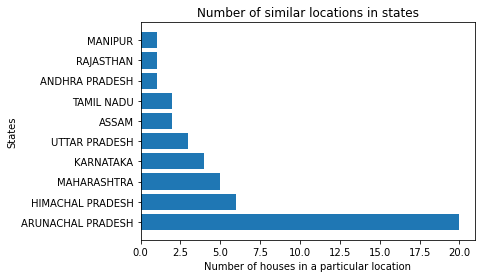</br>
o	Once the user decides on all the fields, we will try to find a locality where such houses are typical. </br>
o	Finally we plot the count of localities per state which tell us which states will have high probabilities of having houses like the one the user describes(implemented in filtering.ipynb) </br>
o	We have implemented this in our UI : we create a plot by taking the mean of percentage of the features that the user selects for a particular field for all the states.


Data Drive link: https://drive.google.com/drive/u/0/folders/1E95sERoGctaKLdZB4Ja-27b9kh180hAC

Google Colab Notebook link: https://colab.research.google.com/drive/1PIYb6W5SO5hH7vtHzuDBrBpkUIv70zwE?usp=sharing

####Importing files and datasets required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframes = ['df_roof','df_condn','df_wall','df_floor','df_room','df_hhold','df_couple','df_owner','df_water','df_light','df_toilet','df_bath','df_waste','df_fuel','df_kitchen','df_assets','df_house']
dataframes_dict = {}
for var in dataframes:
  dataframes_dict[var] = pd.read_csv('/content/drive/MyDrive/project-ds2/' + var +'.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_condn = dataframes_dict['df_condn']
df_condn_residence = df_condn[['State Code','State Name','District Code','District Name', 'Residence: Good','Residence: Livable', 'Residence: Dilapidated']]
dataframes_dict['df_condn_residence'] = df_condn_residence
df_condn_rescumother = df_condn[['State Code','State Name','District Code','District Name', 'Residence-cum-other use: Good','Residence-cum-other use: Livable','Residence-cum-other use: Dilapidated']]
dataframes_dict['df_condn_rescumother'] = df_condn_rescumother
del dataframes_dict['df_condn']

In [ ]:
df_water = dataframes_dict['df_water']
df_water_drinking = df_water[['State Code', 'State Name', 'District Code', 'District Name','Tapwater from treated source', 'Tapwater fromun-treated source','Covered well', 'Un-covered well', 'Handpump', 'Tubewell/Borehole','Spring', 'River/Canal', 'Tank/Pond/Lake', ' Other sources']]
dataframes_dict['df_water_drinking'] = df_water_drinking
del dataframes_dict['df_water']

In [ ]:
df_toilet = dataframes_dict['df_toilet']
df_toilet_in = df_toilet[['State Code','State Name','District Code','District Name','Number of households having latrine facility within the premises','Number of households not having latrine facility within the premises']]
dataframes_dict['df_toilet_in'] = df_toilet_in
df_toilet_disp = df_toilet[['State Code', 'State Name', 'District Code', 'District Name','Piped sewer system', 'Septic tank', 'Other system','With slab/ventilated improved pit', 'Without slab/  open pit','Night soil disposed into open drain', 'Night soil removed by human','Night soil serviced by animal', 'Public latrine', 'Open']]
dataframes_dict['df_toilet_disp'] = df_toilet_disp
del dataframes_dict['df_toilet']

####Createing functions

In [ ]:
def filter_df(dataf,col,thresh=30):
  indexes = []
  for row in dataf.index:
    perc = dataf[col][row]
    if perc >= thresh:
      indexes.append(row)
  return indexes

In [ ]:
def create_plot(dataf):
  plt.figure(figsize=(16,16))
  ind = dataf['State Name'].value_counts().index
  val = dataf['State Name'].value_counts().values
  plt.barh(ind,val)
  plt.title('Number of similar locations in states')
  plt.xlabel('Number of houses in a particular location')
  plt.ylabel('States')

####Interactive Filtering

In [ ]:
len(list(dataframes_dict.keys()))

19

In [ ]:
num = int(input('Enter the number of filters you want to use'))
print('Filter By:')
print('''1) Type of Roof
2) Type of Wall
3) Type of Floor
4) Number of Rooms
5) Number of people in the Household
6) Number of couples
7) Type of Ownership
8) Type of Lighting
9) Type of Bathroom
10)Type of waste
11)Type of Fuel
12)Type of Kitchen
13)Type of Assets
14)Type of House
15)Type of Residence conditions
16)Type of Residence-cum-total conditions
17)Type of drinking water
18)Type of source of Drinking water
19)Type of Toilet Facilities''')
input_list = []
for i in range(num):
  j = int(input("Enter choice"))
  input_list.append(list(dataframes_dict.keys())[j-1])
# print(input_list)

Enter the number of filters you want to use5
Filter By:
1) Type of Roof
2) Type of Wall
3) Type of Floor
4) Number of Rooms
5) Number of people in the Household
6) Number of couples
7) Type of Ownership
8) Type of Lighting
9) Type of Bathroom
10)Type of waste
11)Type of Fuel
12)Type of Kitchen
13)Type of Assets
14)Type of House
15)Type of Residence conditions
16)Type of Residence-cum-total conditions
17)Type of drinking water
18)Type of source of Drinking water
19)Type of Toilet Facilities
Enter choice1
Enter choice2
Enter choice9
Enter choice17
Enter choice7


In [ ]:
index_set = set(np.arange(0,704764,1))
for choice in input_list:
  choice_df = dataframes_dict[choice]
  columns = choice_df.columns
  print(' Select One from {}: \n'.format(choice))
  num = 0
  for i in columns[4:]:
    print(num+1,i)
    num = num + 1
  choice_col = columns[4:][int(int(input("please input the number"))-1)]
  thresh = float(input("The threshold"))
  print(choice_col)
  index_set = index_set.intersection(filter_df(choice_df,choice_col,thresh))
da = dataframes_dict['df_roof'].loc[index_set]
print(da.shape[0],"such locations")

 Select One from df_roof: 

1 Grass/ Thatch/ Bamboo/ Wood/Mud etc.
2 Plastic/ Polythene
3 Hand made Tiles
4 Machine made Tiles
5 Burnt Brick
6 Stone/ Slate
7 G.I./Metal/ Asbestos sheets
8 Concrete
9 Any other material
please input the number1
The threshold50
Grass/ Thatch/ Bamboo/ Wood/Mud etc.
 Select One from df_wall: 

1 Grass/ Thatch/ Bamboo etc.
2 Plastic/ Polythene
3 Mud/Unburnt brick
4 Wood
5 Stone not packed with mortar
6 Stone packed with mortar
7 G.I./ Metal/ Asbestos sheets
8 Burnt brick
9 Concrete
10 Any other material
please input the number1
The threshold50
Grass/ Thatch/ Bamboo etc.
 Select One from df_bath: 

1 Bathroom
2 Enclosure without roof
3 No
please input the number1
The threshold50
Bathroom
 Select One from df_water_drinking: 

1 Tapwater from treated source
2 Tapwater fromun-treated source
3 Covered well
4 Un-covered well
5 Handpump
6 Tubewell/Borehole
7 Spring
8 River/Canal
9 Tank/Pond/Lake
10  Other sources
please input the number1
The threshold50
Tapwater fr

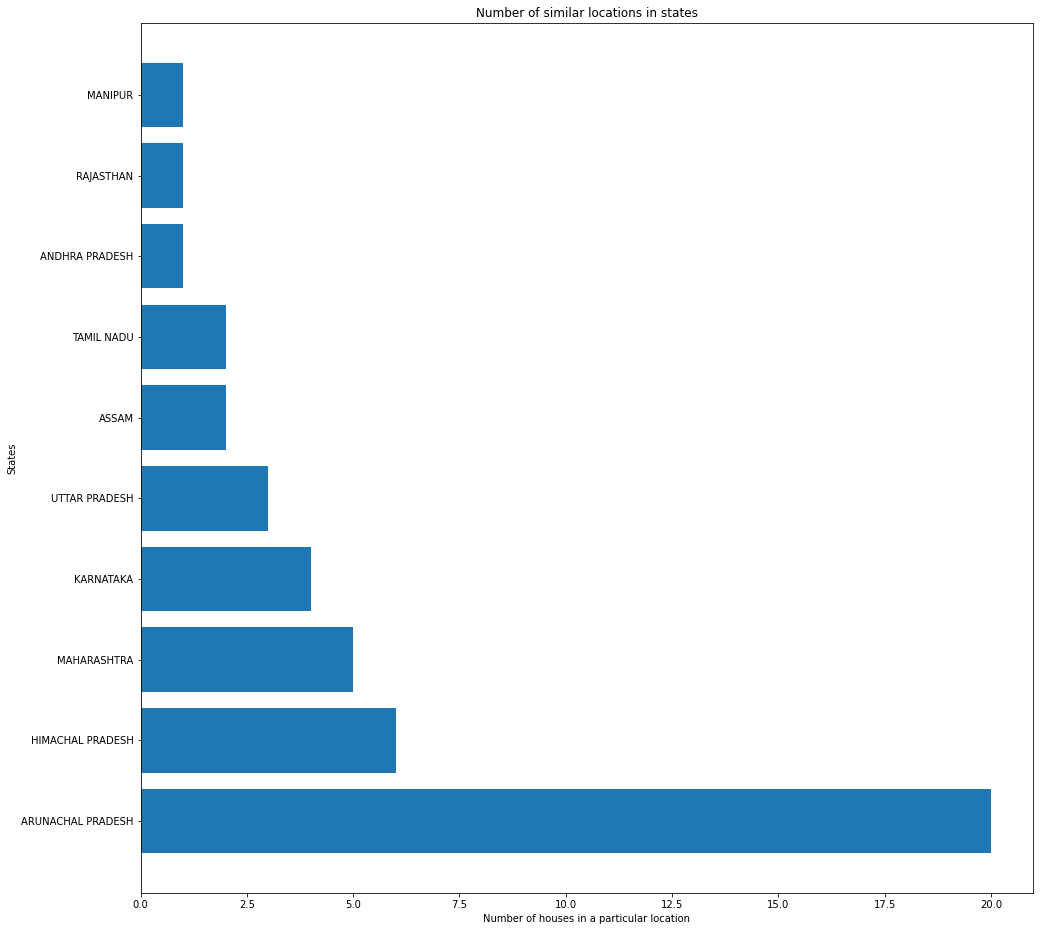

In [ ]:
create_plot(da)